# Project: Investigations on hyperinflations and socio-economical correlations
Author: Dennis Dachkovski

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#domain">Domain Understanding</a></li>
<li><a href="#data">Data Understanding</a></li>
<li><a href="#wrangling">Data Preparation</a></li>
<li><a href="#eda">Data Modeling</a></li>
<li><a href="#results">Results</a></li>
</ul>


<a id='intro'></a>
# Introduction

The  coronavirus pandemic forces central banks into overdrive in order to minimize damage to the economies. One of their measures to regulate the price stability of their currency in the economies are discount rate adjustments. The reduction of interest rates lowers costs for business banks, which in return generate more credit in the fractional reserve banking system. Opinions appear that this crisis may cause hyperinflations in some countries. 

> **Hyperinflation**: In phases of stress to the government budget, such as wars, sociopolitical upheavals, or other crises it is difficult for the government to collect tax revenue. 
If coupled with a strong need to maintain government spending, together with an inability to borrow (for instance if the crisis is global), can lead a country into hyperinflation.

Therefore, this report invastigates historic hyperinflations and their socio-economic correlations based on datasets available from Gapminder.

> **Gapminder**: "Gapminder is an independent Swedish foundation with no political, religious or economic affiliations. Gapminder is a fact tank, not a think tank. Gapminder fights devastating misconceptions about global development." (Source: https://www.gapminder.org/about-gapminder/)

The goal is to summarize historical hyperinflations, to visualize correlations with socio-economical data and generate insights to register a potentially incoming currency crisis in early stages. 
This analysis follows the CRISP-DM process.

<a id='domain'></a>
# Domain Understanding

This analysis includes hyperinflations from different countries and the corresponding reaction of the central bank discount rate during the currency crisis. Furthermore, correlations to population growth, real wages, unemployment rate, social inequality are investigated. The results of the analysis do not state or imply that one change causes another based solely on a correlation.

The report will answer the following questions:
1. When and where did the biggest hyperinflations occur from 1961 to 2017 in each of the countries and how did the central bank discount rate change around that time ?
2. Are there global trends in inflation rates and central bank discount rates?
3. What are the correlations between inflation and 
    a) population growth, 
    b) real income, 
    d) inequality?


<a id='data'></a>
# Data Understanding

- **Name:** Aged 15+ unemployment rate (%)<br>
- **Description:** Percentage of total population, age group above 15, that has been registered as unemployed during the given year.
- **Source:** https://www.ilo.org/ilostat/<br>


- **Name:** Central bank discount rate (annual %)<br>
- **Description:** Central bank discount rate (annual %) 
- **Source:** https://data.un.org/<br>


- **Name:** GINI coefficient<br>
- **Description:** Gini shows income inequality in a society. A higher number means more inequality. 
- **Source:** https://data.worldbank.org/indicator/SI.POV.GINI<br>


- **Name:** Income share of poorest 10%<br>
- **Description:** Percentage share of income or consumption is the share that accrues to subgroups of population indicated by deciles or quintiles. 
- **Source:** https://data.worldbank.org/indicator/SI.DST.FRST.10<br>


- **Name:** Income share of middle 20%<br>
- **Description:** Percentage share of income or consumption is the share that accrues to subgroups of population indicated by deciles or quintiles. Percentage shares by quintile may not sum to 100 because of rounding. 
- **Source:** https://data.worldbank.org/indicator/SI.DST.03RD.20<br>


- **Name:** Income share of richest 10%<br>
- **Description:** Percentage share of income or consumption is the share that accrues to subgroups of population indicated by deciles or quintiles. 
- **Source:** https://data.worldbank.org/indicator/SI.DST.10TH.10<br>


- **Name:** Income per person (GDP/capita, PPP$ inflation-adjusted)<br>
- **Description:** Gross domestic product per person adjusted for differences in purchasing power (in international dollars, fixed 2011 prices, PPP based on 2011 ICP).<br>
- **Source:** http://gapm.io/dgdppc<br>


- **Name:** Inflation (annual %)<br>
- **Description:** Inflation as measured by the annual growth rate of the GDP implicit deflator shows the rate of price change in the economy as a whole. The GDP implicit deflator is the ratio of GDP in current local currency to GDP in constant local currency.
- **Source:** https://data.worldbank.org/indicator/NY.GDP.DEFL.KD.ZG<br>



- **Name:** Population growth (annual %)<br>
- **Description:** Annual population growth rate for year t is the exponential rate of growth of midyear population from year t-1 to t, expressed as a percentage . Population is based on the de facto definition of population, which counts all residents regardless of legal status or citizenship. 
- **Source:** https://data.worldbank.org/indicator/SP.POP.GROW<br>








<a id='wrangling'></a>
## Data Preparation

In this section of the report, the data is loaded, checked for structure and cleanliness, and trimmed for analysis.


### General Properties

First the packages required for the analysis are loaded. In order to plot the vizualisations within the jupyther notebook a so called 'magic word' is used.

In [1]:
# import statements for all of the needed packages

import numpy as np # fast array handling
import pandas as pd # data analysis library
import matplotlib.pyplot as plt # plot library
import seaborn as sns # plot library with statistical parameters 
import scipy.stats as stats # pearson correlation coefficient
import statsmodels.api as sms # linear fit
from sklearn.metrics import r2_score
from functools import reduce # combining pandas dataframes 
from datetime import datetime, timedelta # converting strings to datetime format
from IPython.display import HTML # print dataframes

# 'magic word' so that the visualizations are plotted inline with the notebook

%matplotlib inline 

The next step is to access the data as csv-files and load it into pandas dataframes.

In [2]:
# leading .csv files into pandas dataframes

df_inco = pd.read_csv('data/income_per_person_gdppercapita_ppp_inflation_adjusted.csv') # real income per person
df_unem = pd.read_csv('data/aged_15plus_unemployment_rate_percent.csv') # unemployment rates
df_infl = pd.read_csv('data/inflation_annual_percent.csv') # inflation rates
df_pgro = pd.read_csv('data/population_growth_annual_percent.csv') # population growth rates
df_cbdr = pd.read_csv('data/central_bank_discount_rate_annual_percent.csv') # central bank discount rates
df_gini = pd.read_csv('data/gini.csv') # GINI coefficient as measure for inequality 
df_inco_m20 = pd.read_csv('data/income_share_of_middle_20percent.csv') # income share middle 20%
df_inco_p10 = pd.read_csv('data/income_share_of_poorest_10percent.csv') # income share poorest 10%
df_inco_r10 = pd.read_csv('data/income_share_of_richest_10percent.csv') # income share richest 10%

The format of the files is the same. By printing out a few lines of, we can inspect the format of the data. 

In [3]:
df_infl.head()

,country,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.18,-2.11000,9.44,10.60,8.30,3.88000,0.596,2.430,5.120,4.87
1,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.63,2.42000,4.49,2.31,1.04,0.29000,1.550,0.564,-0.481,1.37
2,Algeria,3.47,2.35,0.549,1.7,1.5,1.82,1.31,3.14,1.92,...,15.40,-11.20000,16.10,18.20,7.48,-0.06180,-0.290,-6.570,0.890,6.80
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.98,-0.00001,1.60,2.50,1.10,0.00036,-0.100,-0.455,0.700,0.90
4,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,19.70,-7.42000,22.40,24.10,5.73,3.75000,-1.310,-3.980,27.700,31.10


The shape of the data is well suited to compare the variables between countries at a certain year. What we want is to analyse time series and aggregating over countries, in order to find global trends. Therefore, a transformation of the shape is needed, so that each year will be in an own row. This way, the dataframe can be easily sorted by the country and year.

What is more, the data is incomplete and may start at different years. To check that, we print the shapes of the dataframes:

In [4]:
# view dimensions of dataset

print(
    " income:", df_inco.shape,
    "\n unemployment:", df_unem.shape,
    "\n inflation:", df_infl.shape,
    "\n population growth:", df_pgro.shape,
    "\n central bank discount rate:", df_cbdr.shape,
    "\n GINI:", df_gini.shape,
    "\n income share middle 20%:", df_inco_m20.shape,
    "\n income share poorest 10%:", df_inco_p10.shape,
    "\n income share richest 10%:", df_inco_r10.shape
)

 income: (193, 242) 
 unemployment: (186, 72) 
 inflation: (193, 58) 
 population growth: (194, 59) 
 central bank discount rate: (141, 60) 
 GINI: (164, 53) 
 income share middle 20%: (164, 53) 
 income share poorest 10%: (163, 53) 
 income share richest 10%: (164, 53)


As assumed, the dataframes differs in both dimensions, countries and years. Which means not all countries are present in each data set and not every country has the same time frames. This has to be considered in the further analysis.


### Data Shaping and Cleaning
The next steps aim to reshape the data in a structure, where the years are in one column. For that, we define a function, that will do that for every source dataframe. After changing the structure of the data, any problems that need to be cleaned, are performed in the second part of this section.

In [5]:
# function to reshape into a more task suited form using melt function

def df_reshape(df, value_name):
    df = pd.melt(df, id_vars = ["country"], var_name = "year", value_name = value_name) 
    df.sort_values(["country", "year"], inplace = True)
    return df

The previous function is called for every dataframe:

In [6]:
df_cbdr_T = df_reshape(df_cbdr, "central_bank_discount_rate")
df_unem_T = df_reshape(df_unem, "unemployment_rate")
df_inco_T = df_reshape(df_inco, "income_per_person")
df_inco_m20_T = df_reshape(df_inco_m20, "income_share_m20")
df_inco_p10_T = df_reshape(df_inco_p10, "income_share_p10")
df_inco_r10_T = df_reshape(df_inco_r10, "income_share_r10")
df_infl_T = df_reshape(df_infl, "inflation")
df_pgro_T = df_reshape(df_pgro, "population_growth")
df_gini_T = df_reshape(df_gini, "gini")

Let's check, whether the new format matches our expectations:

In [7]:
df_infl_T.head(1)

,country,year,inflation
0,Afghanistan,1961,NaN


The format is now as needed, but it is quity unhandy to operate with 8 different dataframes. Thus, we merge them into one dataframe with the 'merge'-function. As some of the dataframes have missing values, an outer join is used. This way, no data is lost, that might be necessary from some of the other columns.

In [8]:
# bundling dataframes into one list
dfs = [df_cbdr_T, df_unem_T, df_infl_T, df_pgro_T, df_gini_T, df_inco_T, df_inco_m20_T, df_inco_p10_T, df_inco_r10_T] 

# reduce() function accepts a function and a sequence and returns a single value calculated
df_final = reduce(lambda left,right: pd.merge(left,right, how='outer', on=['year', 'country']), dfs) 

In [9]:
df_final.head()

,country,year,central_bank_discount_rate,unemployment_rate,inflation,population_growth,gini,income_per_person,income_share_m20,income_share_p10,income_share_r10
0,Albania,1948,NaN,NaN,NaN,NaN,NaN,1770.0,NaN,NaN,NaN
1,Albania,1949,NaN,NaN,NaN,NaN,NaN,1780.0,NaN,NaN,NaN
2,Albania,1950,NaN,NaN,NaN,NaN,NaN,1780.0,NaN,NaN,NaN
3,Albania,1951,NaN,NaN,NaN,NaN,NaN,1860.0,NaN,NaN,NaN
4,Albania,1952,NaN,NaN,NaN,NaN,NaN,1860.0,NaN,NaN,NaN


Now having consolidated the data in a suitable format in one dateframe, the next steps are to check the amout of missing values, the datatypes and for duplicates.

In [10]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46584 entries, 0 to 46583
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   country                     46584 non-null  object 
 1   year                        46584 non-null  object 
 2   central_bank_discount_rate  4566 non-null   float64
 3   unemployment_rate           3028 non-null   float64
 4   inflation                   8535 non-null   float64
 5   population_growth           11178 non-null  float64
 6   gini                        1666 non-null   float64
 7   income_per_person           46513 non-null  float64
 8   income_share_m20            1666 non-null   float64
 9   income_share_p10            1665 non-null   float64
 10  income_share_r10            1666 non-null   float64
dtypes: float64(9), object(2)
memory usage: 4.3+ MB


All datatypes are suitable, exept 'year', which is an string object. Thus we will need to convert it into a datetime object.

In [11]:
# fix data type: year to datetime
df_final['year'] = df_final['year'].apply(lambda x: datetime.strptime(x, '%Y'))

Done that, we can check for duplicates:

In [12]:
# check for duplicates
df_final.duplicated().sum()

0

Furthunately there are no duplicates in the dataframe. We can continue to analyse which column has missing data and how much values are missing.

In [13]:
# count NaNs
df_final.isna().sum() 

country                           0
year                              0
central_bank_discount_rate    42018
unemployment_rate             43556
inflation                     38049
population_growth             35406
gini                          44918
income_per_person                71
income_share_m20              44918
income_share_p10              44919
income_share_r10              44918
dtype: int64

Almost all of the columns have different amouts of missing values. At this point we could drop all the rows where the inflation has missing values, as our goal is to compare inflation to the other parameters. But this would require to drop the NaNs of the other variables at later stages one more time, as we dont know how they are distributed. Therefore, we will not do that at this stage and wait until the relevant columns are defined.

<a id='eda'></a>
## Exploratory Data Analysis and Data Modelling

Now that the data is trimmed, we move on to exploration. We will use statistical analysis and create visualizations with the goal of addressing the research questions that were posed in the Introduction section.

### Research Question 1 a): When and where did the biggest hyperinflations occur from 1961 to 2017 in each of the countries?
In order to find hyperinflations, we first have a look at the original inflation dataframe by plotting the inflation rates in a heatmap.

In [14]:
df = df_infl.set_index('country') # setting country columns as index columns for the heatmap

In [15]:
df = df.dropna() # dropping NaNs

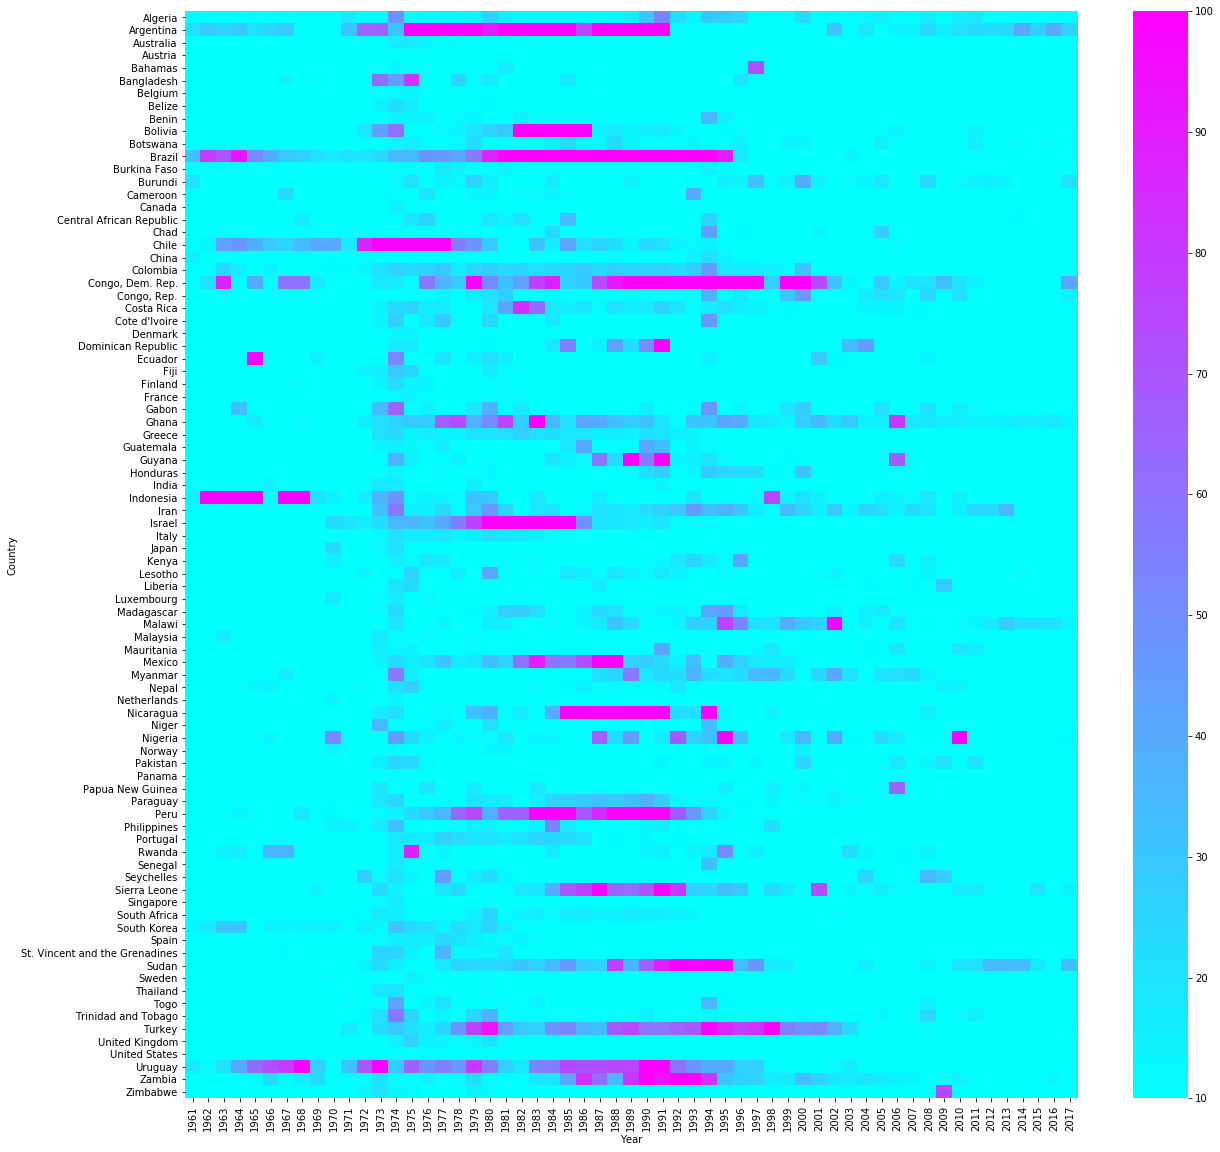

In [16]:
# plotting heatmap
plt.subplots(figsize=(20, 20))
sns.heatmap(df, vmin=10, vmax=100.0, cmap='cool')
plt.xlabel('Year')
plt.ylabel('Country')
plt.show();

In order to find the peaks of these hyperinflations, we have to query the dataframe for high inflation values. There are different definitions, when to consider an inflation rate a "hyperinflation". For simplicity, I have chosen an annual inflation of more than 100% (CAUTION: the common definition is 50% per month).

In [17]:
# Querying dataframe for rows with an inflation rate higher than 100
df_hyper = df_final.query('inflation > 100')

# creating list of countries with hyperinflations for further analysis
hyper_countries = df_hyper.country.unique()

The next step is to extract the relevant columns, which are country, year and inflation. The resulting dataframe is then grouped by country, to find the maximum inflation for each country.

In [18]:
# new dataframe with year, country, inflation
countries_hyper = df_hyper.loc[:, ['country','year', 'inflation']] 

# create boolean index, where inflation is maximum
index = countries_hyper.groupby(['country'])['inflation'].transform(max) == countries_hyper['inflation'] 

# save only maximum inflation rows
countries_hyper = countries_hyper[index] 
countries_hyper_html = HTML(countries_hyper.to_html(index=False))
countries_hyper_html

country,year,inflation
Albania,1992-01-01,250.0
Angola,1996-01-01,4800.0
Armenia,1994-01-01,4110.0
Azerbaijan,1994-01-01,1390.0
Belarus,1994-01-01,1950.0
Bolivia,1985-01-01,12300.0
Brazil,1990-01-01,2700.0
Bulgaria,1997-01-01,959.0
Chile,1974-01-01,679.0
"Congo, Dem. Rep.",1994-01-01,26800.0


The resulting dataframe contains the biggest hyperinflations for each country.

### Research Question 1 b): How did the central bank discount rate change around that time in each of the countries?

To answer this question, we need to add a time intervals around the hyperinflation times from the previous result. 
Nevertheless, we have to consider, that the central bank discount rate has missing values compared to the inflation column. That means we cannot plot complete lines for the central bank discount rate together with the inflation rates for all the countries. 

In [19]:
df_hyper.loc[:, ['country', 'year', 'inflation', 'central_bank_discount_rate']].isna().sum()

country                         0
year                            0
inflation                       0
central_bank_discount_rate    118
dtype: int64

In order to create the time intervall around the hyperinflation peaks, we loop through the hyperinflation dataframe and use the year for a second loop, where the time column is extended. To be more specific, we subtract 10 years (3650 days, as the timedelta function doesn't accept years) for the lower boundary and add 20 years for the upper boundary, resulting in a time box of 20 years for each hyperinflation. 

In [20]:
# init dataframe
df_hyper_time = pd.DataFrame(columns=df_final.columns)

# looping through countries_hyper and extract country and year
for country, year in zip(countries_hyper.country, countries_hyper.year):
    
    # the secound loop iterates through a list of years starting 10 years before and ends 10 years after hyperinflation
    for year_2 in pd.date_range(start=year - timedelta(days=3650), periods=20, freq='YS'):
        
        # querying the complete dataframe with those additional years 
        df = df_final.query('country == "{}" & year == "{}"'.format(country,year_2))
        
        # appending the additional data points from the main dataframe to the hyperinflation dataframe
        df_hyper_time = df_hyper_time.append(df, ignore_index=True, sort=False)
        
df_hyper_time.head()

,country,year,central_bank_discount_rate,unemployment_rate,inflation,population_growth,gini,income_per_person,income_share_m20,income_share_p10,income_share_r10
0,Albania,1983-01-01,NaN,NaN,-0.01680,2.12,NaN,4260.0,NaN,NaN,NaN
1,Albania,1984-01-01,NaN,NaN,-0.02840,2.10,NaN,4280.0,NaN,NaN,NaN
2,Albania,1985-01-01,NaN,NaN,0.35100,2.06,NaN,4300.0,NaN,NaN,NaN
3,Albania,1986-01-01,NaN,NaN,-2.38000,1.93,NaN,4330.0,NaN,NaN,NaN
4,Albania,1987-01-01,NaN,NaN,0.00003,2.00,NaN,4360.0,NaN,NaN,NaN


For plotting the hyperinflations for each country, we iterate through the countries in the original countries_hyper dataframe ( as there the country names occur only one time), and query the time enriched **'df_hyper_time'** dataframe with those names. In order to avoid plotting inflations, where there is not enough data for central bank discount rate to plot, we use an if statement, which is only true, when the sum of missing years is less to 5.

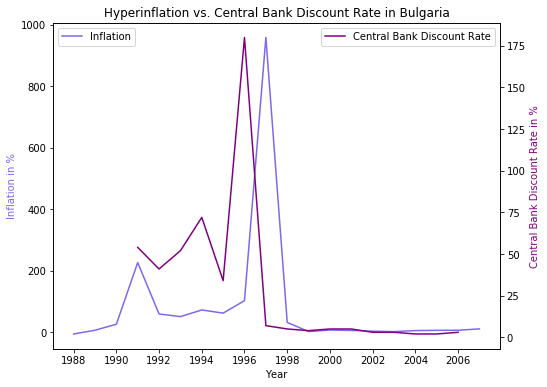

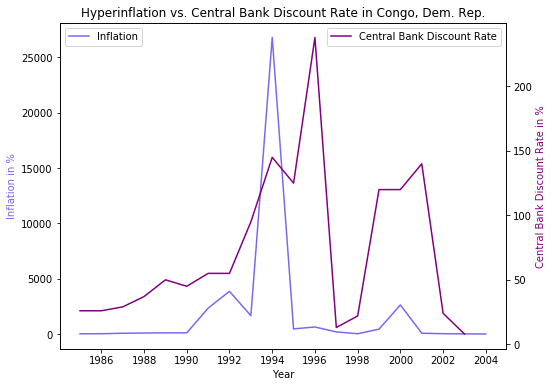

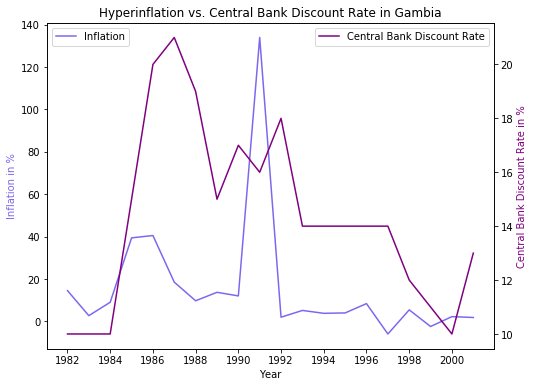

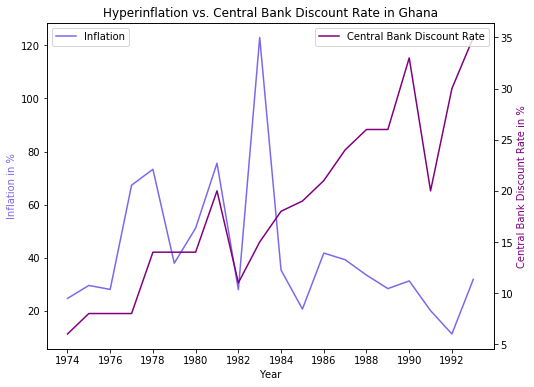

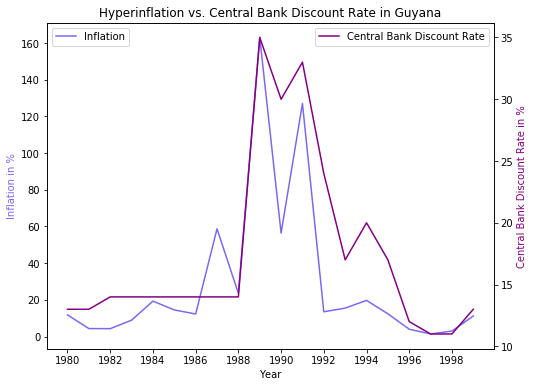

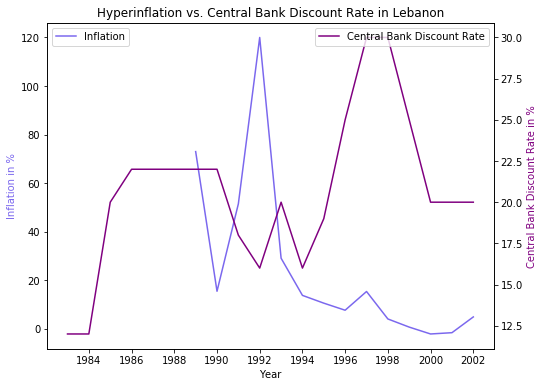

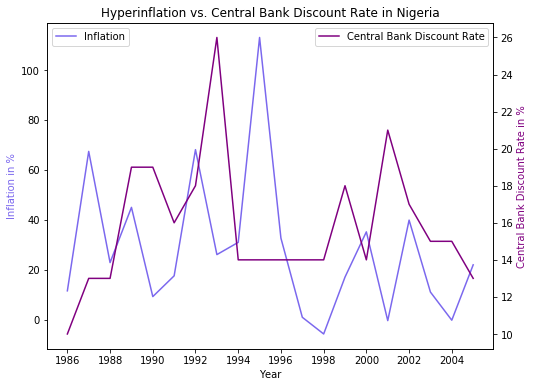

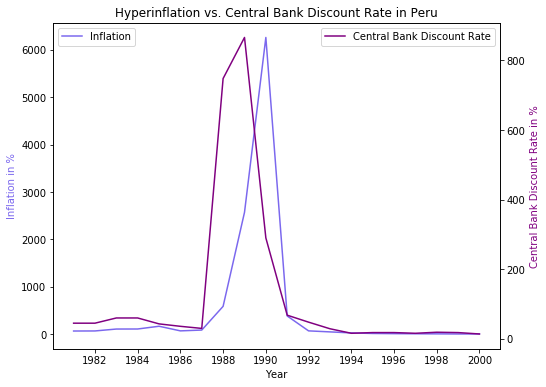

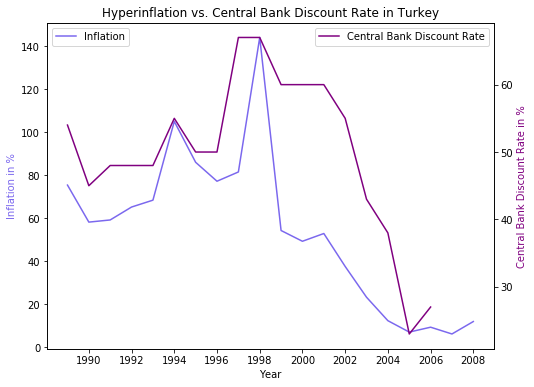

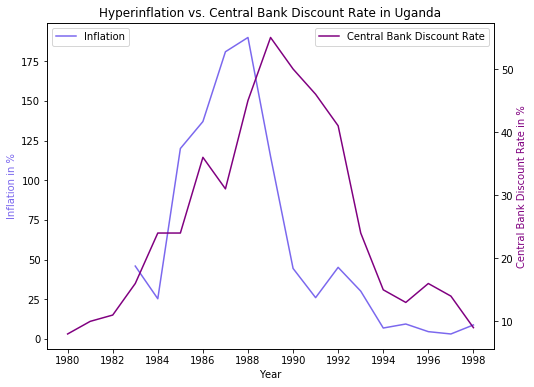

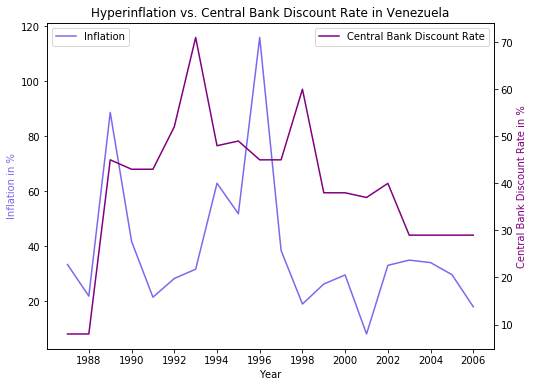

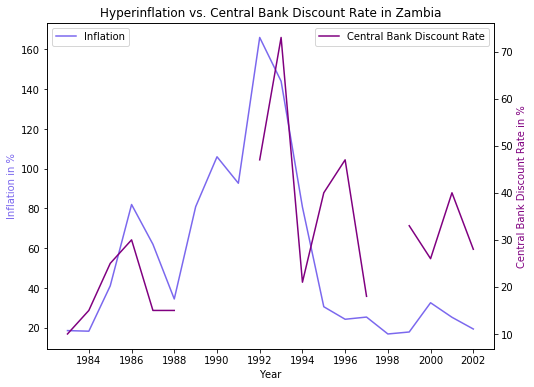

In [21]:
# extracting country names from countries_hyper dataframe
for country in countries_hyper.country:
    
    # querying df_hyper_time with those country names
    df_hyper_time_plot = df_hyper_time.query('country == "{}"'.format(country))
    
    # filtering only subsets with missing values less than 5
    if df_hyper_time_plot['central_bank_discount_rate'].isna().values.sum() < 5:
        
        # assigning the variables
        x = df_hyper_time_plot.year
        y1 = df_hyper_time_plot.inflation
        y2 = df_hyper_time_plot.central_bank_discount_rate
        
        #creating figure for each country
        fig, ax1 = plt.subplots(figsize=(8, 6))
        ax1.set_title('Hyperinflation vs. Central Bank Discount Rate in {}'.format(country))
        ax2 = ax1.twinx()
        line1= ax1.plot(x, y1, color='mediumslateblue')
        line2= ax2.plot(x, y2, color='purple')
        ax1.legend(["Inflation"],loc=2)
        ax2.legend(["Central Bank Discount Rate"],loc=1)
        ax1.set_xlabel('Year')
        ax1.set_ylabel('Inflation in %', color='mediumslateblue')
        ax2.set_ylabel('Central Bank Discount Rate in %', color='purple')
        plt.show()

It seems that hyperinflations take place relatively fast, which means that a big increase in inflation rates take usually place within one or few years. Furthermore, the central bank discount rate is often following the inflation rate. To check that, we create a scatter plot together with a linear fit for the statistical parameter if the the correlation. To fit the big differences between different inflations, we plot a logarithmic scale.

In [22]:
# drop NaNs from central bank discount rate and inflation
df_cbdr_infl = df_hyper_time[df_hyper_time[['central_bank_discount_rate', 'inflation']].notna().all(1)][['central_bank_discount_rate', 'inflation']]

In [23]:
# creating a linear fit model
df_cbdr_infl_log = np.log(df_cbdr_infl).dropna()

X = df_cbdr_infl_log.inflation
y = df_cbdr_infl_log.central_bank_discount_rate


lm = sms.OLS(y, X)
results = lm.fit()
results.summary()

/Users/dennis/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     OLS Regression Results                                    
===============================================================================================
Dep. Variable:     central_bank_discount_rate   R-squared (uncentered):                   0.886
Model:                                    OLS   Adj. R-squared (uncentered):              0.886
Method:                         Least Squares   F-statistic:                              3342.
Date:                        Sun, 02 Aug 2020   Prob (F-statistic):                   6.83e-205
Time:                                20:06:34   Log-Likelihood:                         -672.82
No. Observations:                         431   AIC:                                      1348.
Df Residuals:                             430   BIC:                                      1352.
Df Model:                                   1                                                  
Covariance Type:                    nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
inflation      0.8228      0.014     57.813      0.000       0.795       0.851
==============================================================================
Omnibus:                      125.460   Durbin-Watson:                   0.945
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              549.375
Skew:                          -1.210   Prob(JB):                    5.07e-120
Kurtosis:                       7.974   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

/Users/dennis/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


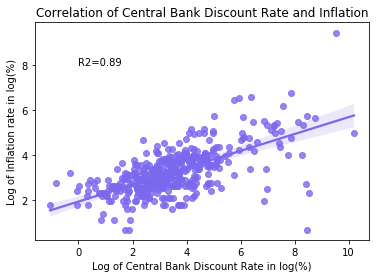

In [24]:
# scatter plot for inflation and central bank discount rate
X = np.log(df_cbdr_infl.inflation)
y = np.log(df_cbdr_infl.central_bank_discount_rate)

f, ax = plt.subplots()
sns.regplot(X,y, color='mediumslateblue')
plt.annotate('R2={:03.2f}'.format(results.rsquared), xy=(0.0, 8.0))

plt.title('Correlation of Central Bank Discount Rate and Inflation')
plt.xlabel('Log of Central Bank Discount Rate in log(%)')
plt.ylabel('Log of Inflation rate in log(%)');

The scatter plot shows a strong correlation between inflation rates and central bank inflation rates. Thus we can conclude that a central banks most propably will rise the interest rates when an inflation gets out of control.

### Research Question 2: Are there global trends in inflation rates and central bank discount rates?
To answer this question, we need to plot the mean and median inflation rate and central bank discount rates for all countries. For that we group the inflatin rates by year and take the mean and median for all the inflation rates belonging to the same year.

In [25]:
df = df_final.groupby(["year"]).mean().reset_index() # group whole dataframe by year

In [26]:
df = df[['year','central_bank_discount_rate','inflation']].dropna() # drop NaNs

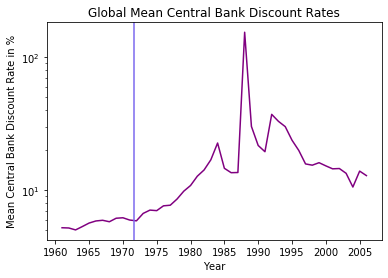

In [27]:
# line plot with logarithmic scale for central bank discount rate
X = df.year
y = df.central_bank_discount_rate

plt.figure()
plt.plot(X, y, color='purple')
plt.yscale('log')
plt.axvline(x=datetime(1971,8,15), color='mediumslateblue') # Announcement of End of Bretton Woods System
plt.title('Global Mean Central Bank Discount Rates')
plt.xlabel('Year')
plt.ylabel('Mean Central Bank Discount Rate in %');

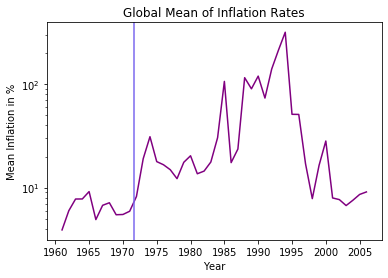

In [28]:
# line plot with logarithmic scale for inflation
X = df.year
y = df.inflation#.rolling(3).mean()

plt.figure()
plt.plot(X, y, color='purple')
plt.yscale('log')
plt.axvline(x=datetime(1971,8,15), color='mediumslateblue') # Announcement of End of Bretton Woods System
plt.title('Global Mean of Inflation Rates')
plt.xlabel('Year')
plt.ylabel('Mean Inflation in %');

In [29]:
df = df_final.groupby(["year"]).median().reset_index()

In [30]:
df = df[['year','central_bank_discount_rate','inflation']].dropna()

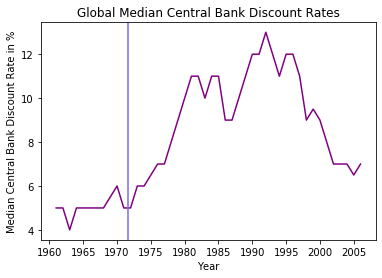

In [31]:
# line plot with logarithmic scale for central bank discount rate
X = df.year
y = df.central_bank_discount_rate

plt.figure()
plt.plot(X, y, color='purple')
plt.axvline(x=datetime(1971,8,15), color='mediumslateblue') # Announcement of End of Bretton Woods System
plt.title('Global Median Central Bank Discount Rates')
plt.xlabel('Year')
plt.ylabel('Median Central Bank Discount Rate in %');

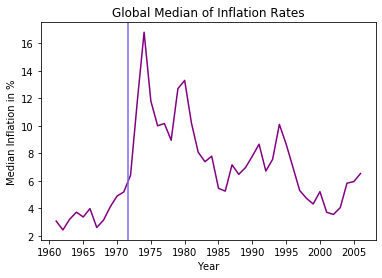

In [32]:
# line plot with logarithmic scale for inflation
X = df.year
y = df.inflation

plt.figure()
plt.plot(X, y, color='purple')
plt.axvline(x=datetime(1971,8,15), color='mediumslateblue') # Announcement of End of Bretton Woods System
plt.title('Global Median of Inflation Rates')
plt.xlabel('Year')
plt.ylabel('Median Inflation in %');

We can see an increasing mean and declining median with increasing years, which leads to the conclusion, that hyperinflations became stronger and get more concentrated in few countries up to approximately 1995. 

### Research Question 3:  What are the correlations between worldwide mean inflation and ...
For the following questions we will have the same analysis process with different variables. Therefore, we define a reusable function to do the preparation and plotting of the data. The function takes as input 2 dataframe, one as source for the inflation rate and the other the dataframe for the variable. The dataframes are processed individually outside the function, giving more freedom to include more processing, like derivation. Then the data is grouped by year, merged and plotted in a time domain and a scatter plot. 

In [33]:
# definition of correlation plot function

def correlation(df_1, unit_1, df_2, unit_2, r2=False):
    '''
    INPUT:
    DataFrame - variable 1
    DataFrame - variable 2 to be correlated to variable 1
    
    OUTPUT:
    Line Plot - a line plot between 2 variables with correlation coefficient
    
    Provides a plot that can be used to understand the correlation between the 
    input variables by providing the R squared correlation coefficient.
    '''
    
    # merging both dataframes with an inner join and dropping nulls of the involved columns
    df_combined = pd.merge(df_1, df_2, how='inner', on='year').dropna(subset=[df_1.columns[0], df_2.columns[0]])
    
    # plotting both dataframes in time domain
    fig = plt.figure()
    ax2 = fig.add_subplot(1, 1, 1)
    ax1 = ax2.twinx()
    x = df_combined.index
    y1 = df_combined.iloc[:,0]
    y2 = df_combined.iloc[:,1]
    
    # strip name from dataframe of variable and remove underscore
    y1_name = df_1.columns[0].strip().replace("_", " ").capitalize()
    y2_name = df_2.columns[0].strip().replace("_", " ").capitalize()
    
    # calculate and annotate R2 correlation
    if r2:
        plt.annotate('R2={:03.2f}'.format(r2_score(y1,y2)), xy=(datetime(2008,1,1), 300.0))
    
    plt.title('Comparison between {} and {}'.format(y1_name, y2_name))
        
    # plot inflation rate and variable with own axis
    ax1.set_xlabel('Year')
    
    ax2.plot(x, y2, 'mediumslateblue')
    ax2.set_ylabel('{} in {}'.format(y2_name, unit_2), color='mediumslateblue')
    
    ax1.plot(x, y1, 'purple')
    ax1.set_ylabel('{} in {}'.format(y1_name, unit_1), color='purple')

The following correlations are plotted by processing the data for each variable and passing it into the correlation function. 

### a) ... population growth?

To answer this question, we have to plot the mean of the inflation rates and population growth over all countries at each year. For doing this, we first check with a heatmap, whether all states are equally respresented in the dataset. If thats the case, we can proceed to extract the relevant variables from the main dataframe and drop the null values.

In [34]:
df = df_pgro.set_index('country')

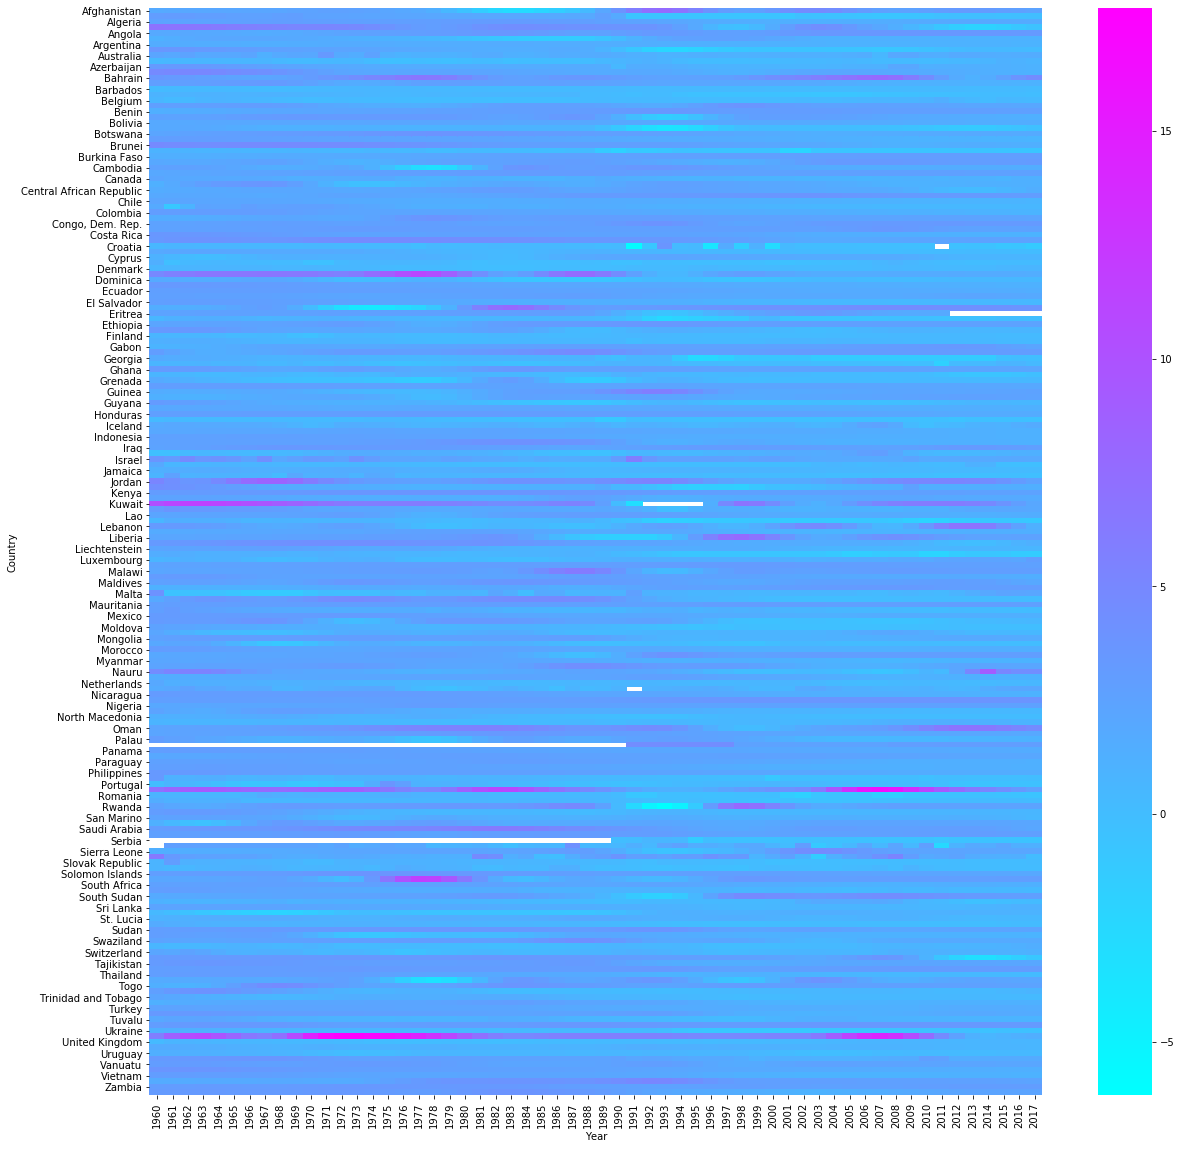

In [35]:
plt.subplots(figsize=(20, 20))
sns.heatmap(df, vmin=df.min().min(), vmax=df.max().max(), cmap='cool')
plt.xlabel('Year')
plt.ylabel('Country')
plt.show();

These are few white spots, which means these is few missing data. Thus we can proceed to extract the relevant columns, drop the null values, group by year and take the mean.

In [36]:
df_plgr = df_final[['year','population_growth']].dropna() # drop NaNs

In [37]:
# inflation rates are grouped by year and averaged.
df_infl = df_final[['year','inflation']]  
df_infl = df_infl.groupby('year').mean()

In [38]:
df_plgr = df_plgr.groupby('year').mean()

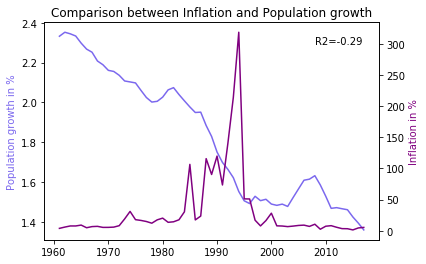

In [39]:
correlation(df_infl,'%', df_plgr, '%', True)

It seems that the highest inflations occured, when the population growth rate decreased fast.
To analyse this correlation, we plot the first derivative of the growth rate agains the time (measure for speed of change). 

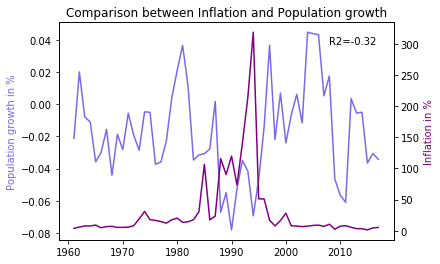

In [40]:
# plotting inflation rate together with derivative if population growth
correlation(df_infl, '%', df_plgr.diff(), '%', True)

As assumed, we find a good correlation with a correlation coefficient of **R=0.32**. We can conclude that hyperinflations are more likely to occure during times, when the population growth is slowing down too fast.

### b) ... real income?
For this question, we compare the mean income per person with the mean inflation rate.

In [41]:
df = df_inco.set_index('country')

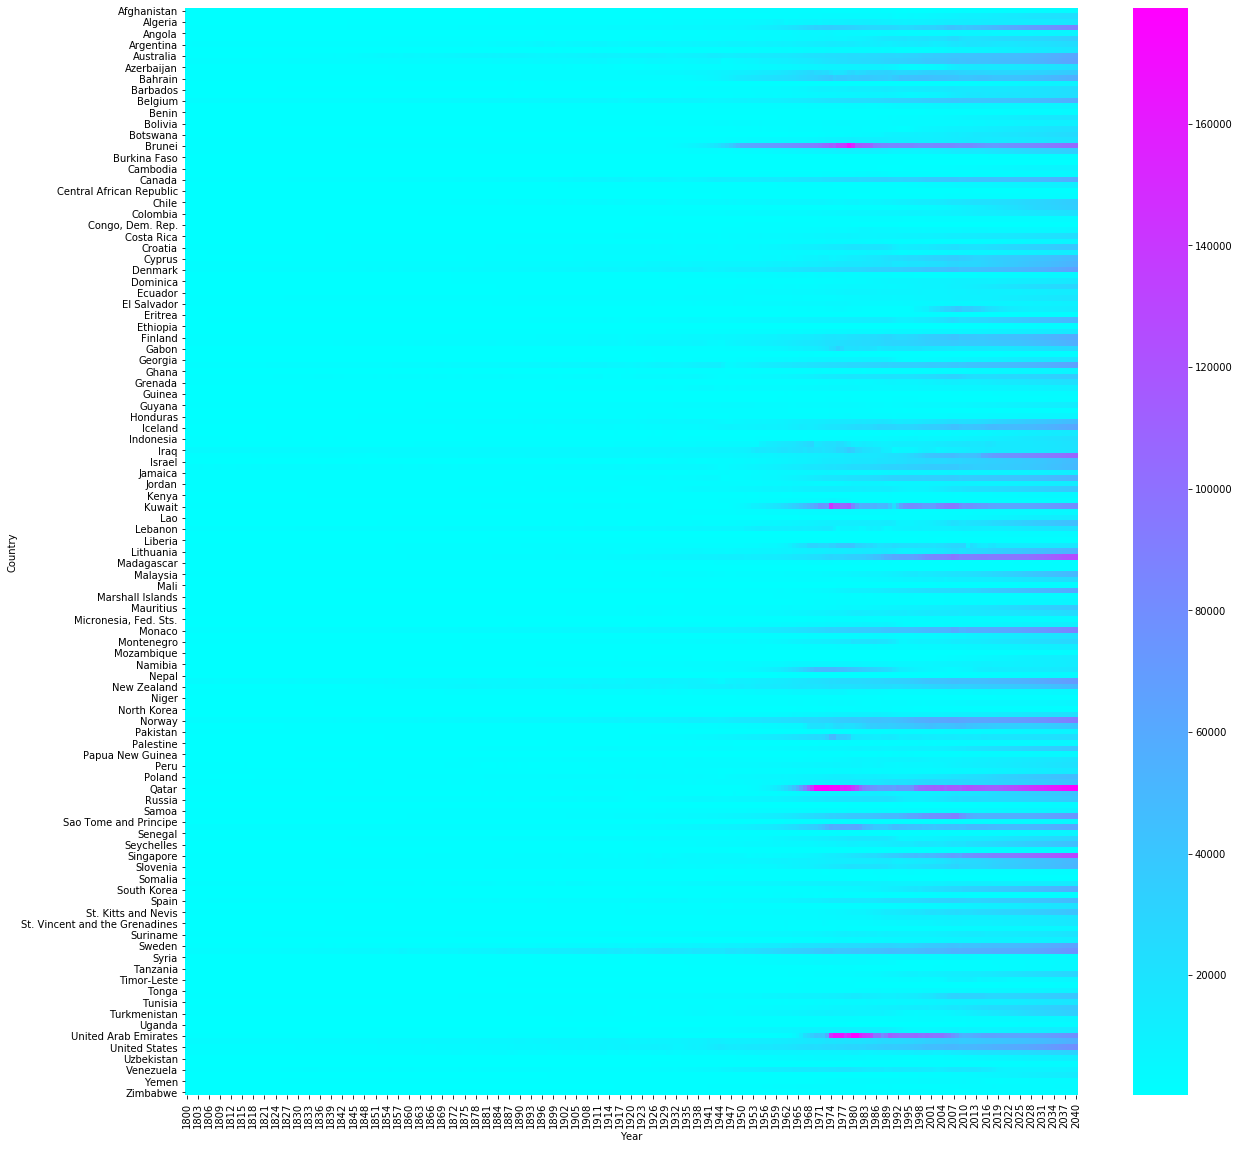

In [42]:
plt.subplots(figsize=(20, 20))
sns.heatmap(df, vmin=df.min().min(), vmax=df.max().max(), cmap='cool')
plt.xlabel('Year')
plt.ylabel('Country')
plt.show();

The heatmap shows, that there is no missing data. But  the data includes years beyond 2019, which shows, that its calculated and not measured data.

In [43]:
df = df_final[['year','income_per_person']].dropna()
df = df.groupby('year').mean()
df.head()

,income_per_person
year,
1800-01-01,978.523316
1801-01-01,978.948187
1802-01-01,980.725389
1803-01-01,980.922280
1804-01-01,981.911917


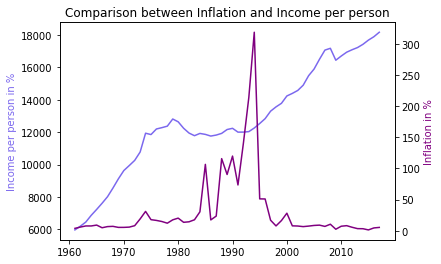

In [44]:
correlation(df_infl, '%', df, '%', False)

The comparison shows, that the mean real income is stagnating in times of high inflation rates.  

### c) ... income share poorest 10%?
For this question, we compare the income share of the poorest 10% with the inflation rate.

In [45]:
df = df_inco_p10.set_index('country')

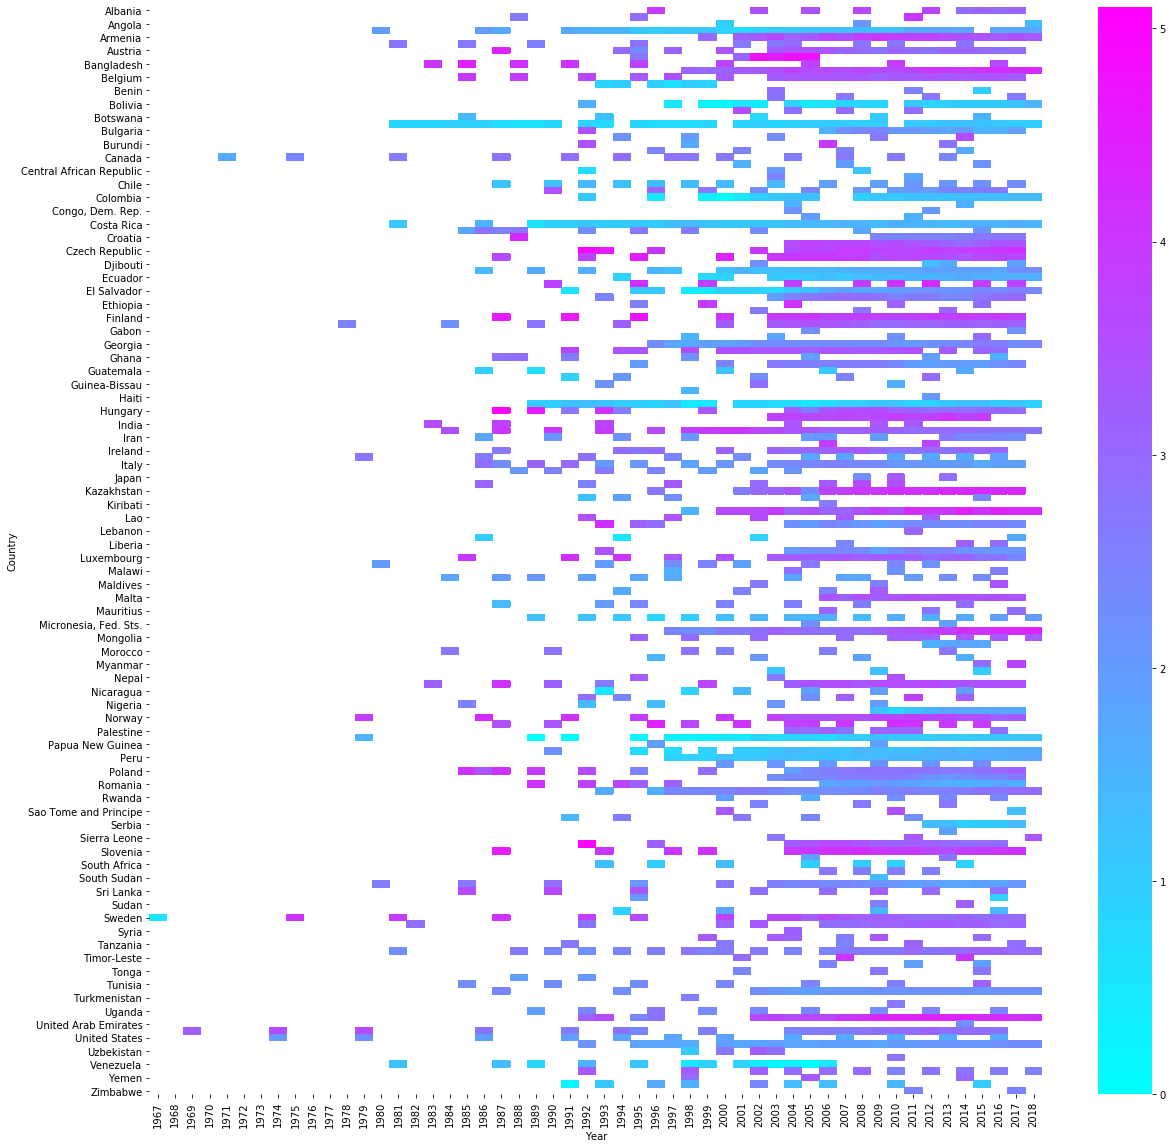

In [46]:
plt.subplots(figsize=(20, 20))
sns.heatmap(df, vmin=df.min().min(), vmax=df.max().max(), cmap='cool')
plt.xlabel('Year')
plt.ylabel('Country')
plt.show();

The data contains a lot missing data, which makes an aggregation not representative. 

### c) ... income share middle 20%?
For this question, we compare the income share of the middle 20% with the inflation rate.

In [47]:
df = df_inco_m20.set_index('country')

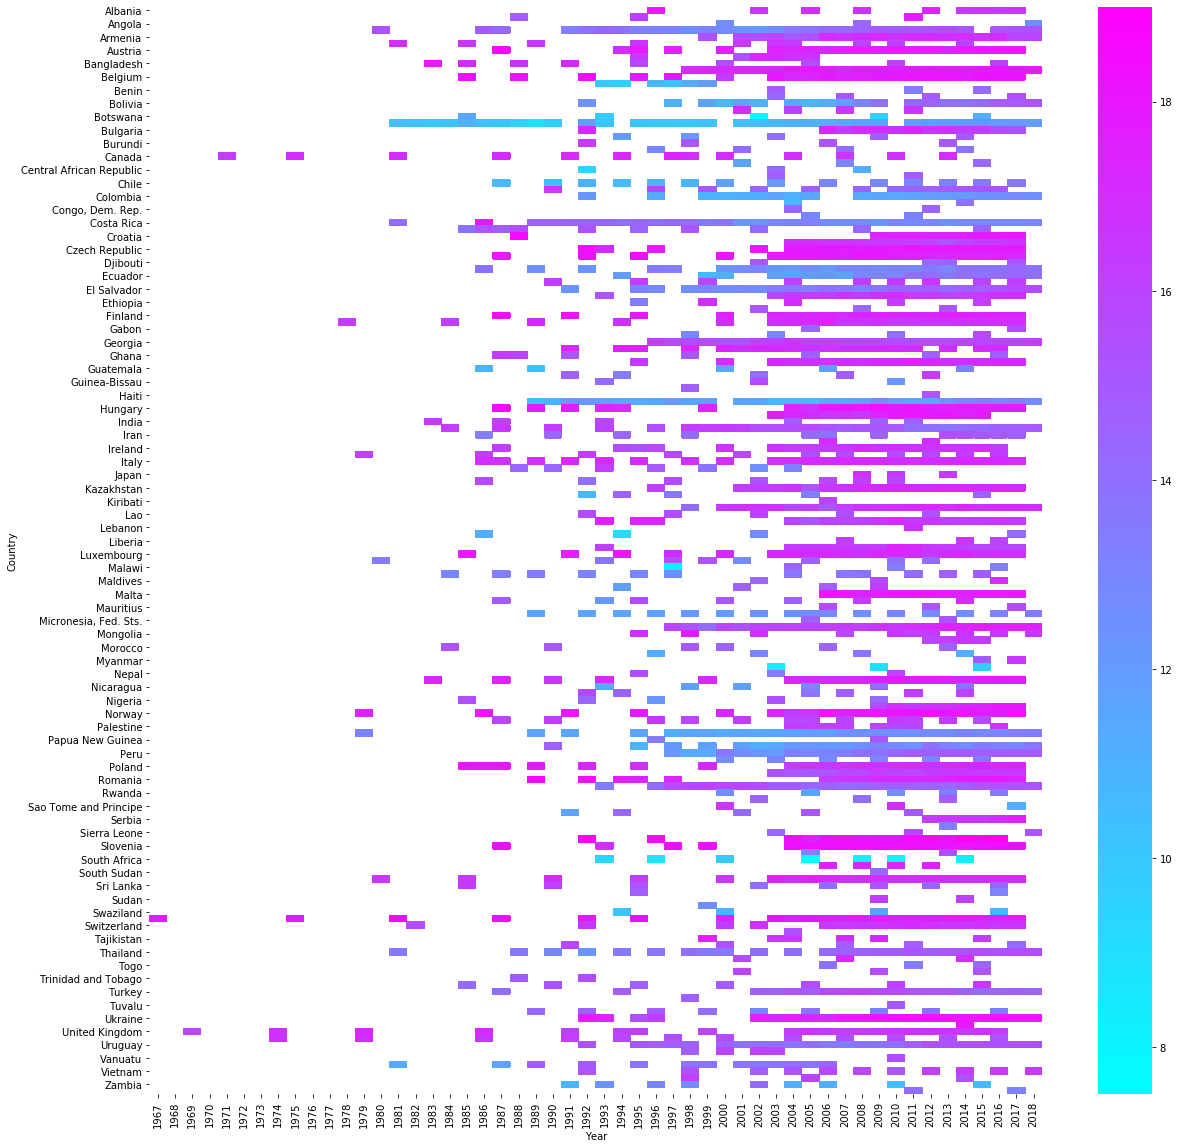

In [48]:
plt.subplots(figsize=(20, 20))
sns.heatmap(df, vmin=df.min().min(), vmax=df.max().max(), cmap='cool')
plt.xlabel('Year')
plt.ylabel('Country')
plt.show();

The data contains a lot missing data, which makes an aggregation not representative. 

### c) ... income share richest 10%?
For this question, we compare the income share of the richest 10% with the inflation rate.

In [49]:
df = df_inco_r10.set_index('country')

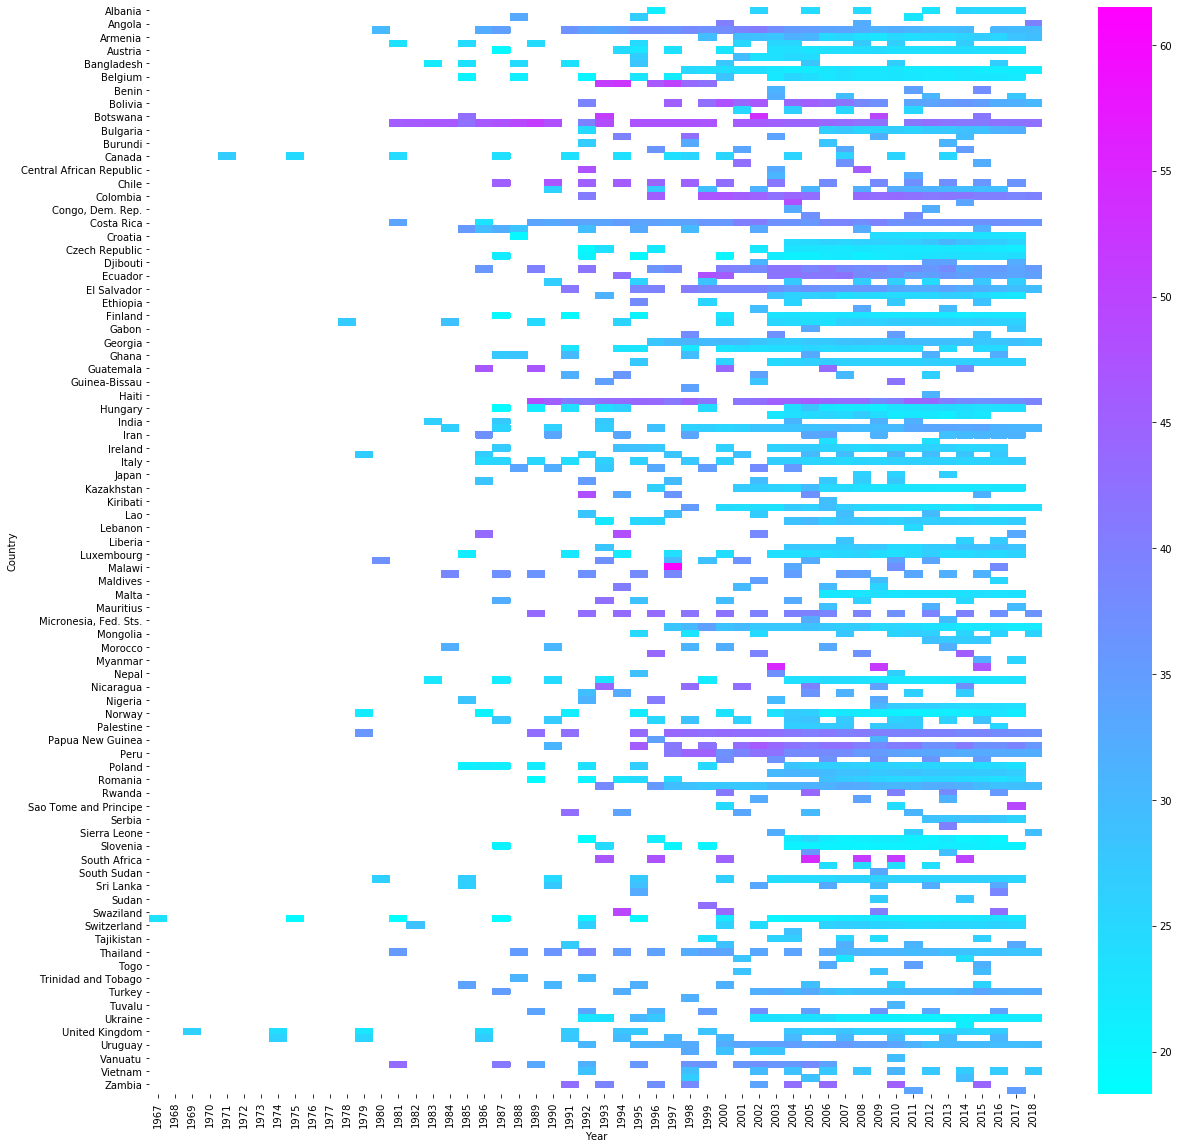

In [50]:
plt.subplots(figsize=(20, 20))
sns.heatmap(df, vmin=df.min().min(), vmax=df.max().max(), cmap='cool')
plt.xlabel('Year')
plt.ylabel('Country')
plt.show();

The data contains a lot missing data, which makes an aggregation not representative. 

### d) ... unemployment?
For this question, we compare the mean unemployment rate with the mean inflation rate.

In [51]:
df = df_unem.copy()
df = df[df.country.isin(hyper_countries)]
df = df.set_index('country')

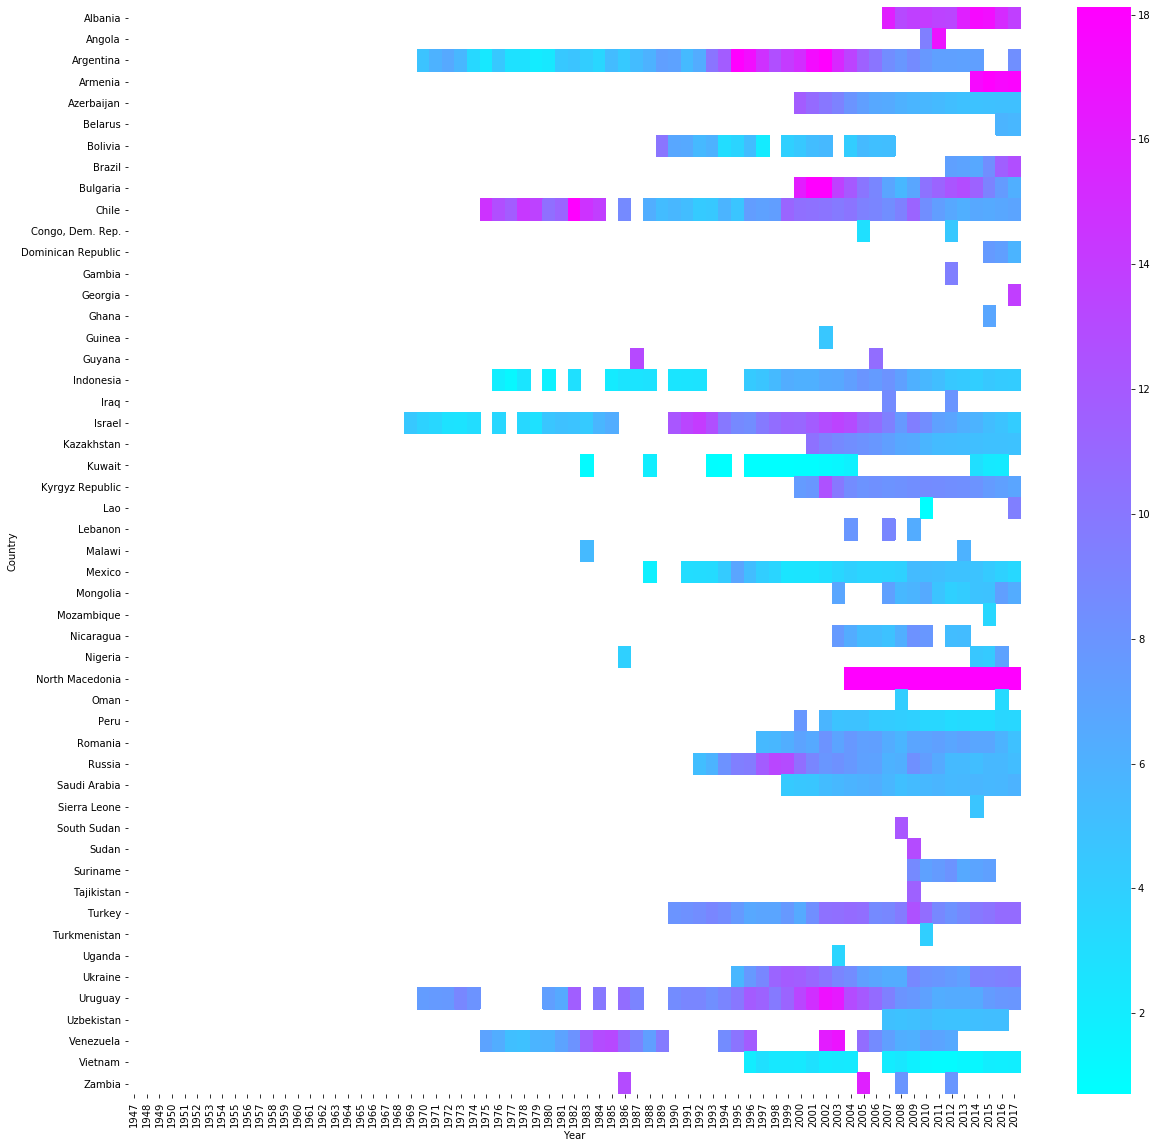

In [52]:
plt.subplots(figsize=(20, 20))
sns.heatmap(df, vmin=df.min().min(), vmax=df.max().mean(), cmap='cool')
plt.xlabel('Year')
plt.ylabel('Country')
plt.show();

The data contains a lot missing data, which makes an aggregation not representative. 

### d) ... inequality?
For this question, we compare the mean GINI coefficient, which is a measure to the social inequality, with the mean inflation rate.

In [53]:
df = df_gini.set_index('country')

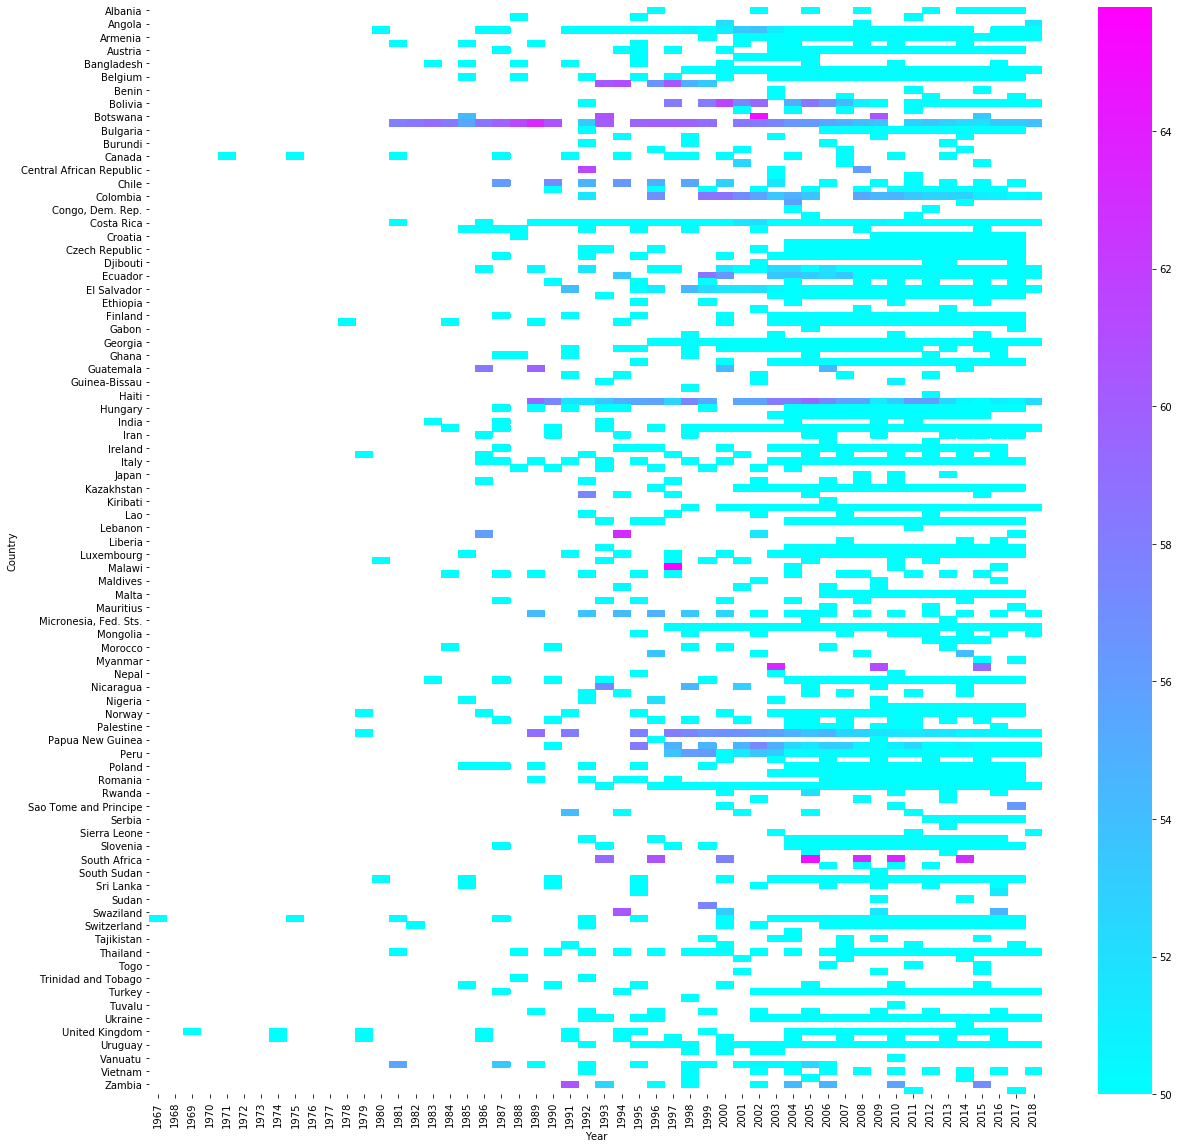

In [54]:
plt.subplots(figsize=(20, 20))
sns.heatmap(df, vmin=50, vmax=df.max().max(), cmap='cool')
plt.xlabel('Year')
plt.ylabel('Country')
plt.show();

The data contains a lot missing data, which makes an aggregation not representative. 

### Finding country with maximum data points

To overcome the problem with the incomplete data, wesearch for countries with least missing data for our data of interest:

In [55]:
df_hyper.groupby("country").unemployment_rate.describe()['count'].idxmax()

'Argentina'

In [56]:
df_hyper.groupby("country").gini.describe()['count'].idxmax()

'Brazil'

In [57]:
df_hyper.groupby("country").income_share_p10.describe()['count'].idxmax()

'Brazil'

In [58]:
df_hyper.groupby("country").income_share_m20.describe()['count'].idxmax()

'Brazil'

In [59]:
df_hyper.groupby("country").income_share_r10.describe()['count'].idxmax()

'Brazil'

In [60]:
df_hyper.groupby("country").income_per_person.describe()['count'].idxmax()

'Argentina'

In [61]:
df_hyper.groupby("country").population_growth.describe()['count'].idxmax()

'Argentina'

### Unemployment in Argentina

In [62]:
df = df_final.query('country == "Argentina"')
df.head()

,country,year,central_bank_discount_rate,unemployment_rate,inflation,population_growth,gini,income_per_person,income_share_m20,income_share_p10,income_share_r10
8438,Argentina,1947-01-01,NaN,NaN,NaN,NaN,NaN,8940.0,NaN,NaN,NaN
8439,Argentina,1948-01-01,NaN,NaN,NaN,NaN,NaN,9230.0,NaN,NaN,NaN
8440,Argentina,1949-01-01,NaN,NaN,NaN,NaN,NaN,8870.0,NaN,NaN,NaN
8441,Argentina,1950-01-01,NaN,NaN,NaN,NaN,NaN,8760.0,NaN,NaN,NaN
8442,Argentina,1951-01-01,NaN,NaN,NaN,NaN,NaN,8910.0,NaN,NaN,NaN


In [63]:
# smothing the curve with a rolling mean over 3 years
df_1 = df[['year','inflation']].set_index('year').rolling(3).mean() 
df_2 = df[['year','unemployment_rate']].set_index('year').rolling(3).mean()

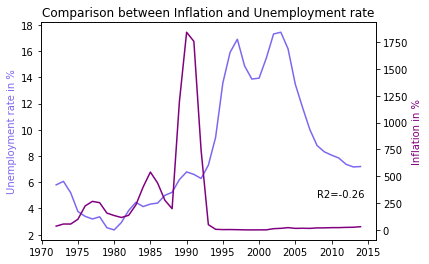

In [64]:
correlation(df_1, '%', df_2, '%', True)

There is a sharp increase in the inflation rate around 1990 followed by an increase of unemployment.

### Income per person in Argentina

In [65]:
df = df_final.query('country == "Argentina"')
df.head()

,country,year,central_bank_discount_rate,unemployment_rate,inflation,population_growth,gini,income_per_person,income_share_m20,income_share_p10,income_share_r10
8438,Argentina,1947-01-01,NaN,NaN,NaN,NaN,NaN,8940.0,NaN,NaN,NaN
8439,Argentina,1948-01-01,NaN,NaN,NaN,NaN,NaN,9230.0,NaN,NaN,NaN
8440,Argentina,1949-01-01,NaN,NaN,NaN,NaN,NaN,8870.0,NaN,NaN,NaN
8441,Argentina,1950-01-01,NaN,NaN,NaN,NaN,NaN,8760.0,NaN,NaN,NaN
8442,Argentina,1951-01-01,NaN,NaN,NaN,NaN,NaN,8910.0,NaN,NaN,NaN


In [66]:
# smothing the curve with a rolling mean over 3 years
df_1 = df[['year','inflation']].set_index('year').rolling(3).mean()
df_2 = df[['year','income_per_person']].set_index('year').rolling(3).mean()

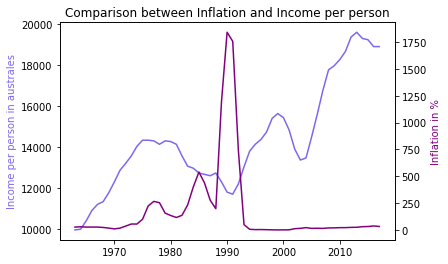

In [67]:
correlation(df_1, '%', df_2, 'australes', False)

There is a sharp increase in the inflation rate around 1990 together with a decrease of income at the same time.

### Population growth in Argentina

In [68]:
df = df_final.query('country == "Argentina"')
df.head()

,country,year,central_bank_discount_rate,unemployment_rate,inflation,population_growth,gini,income_per_person,income_share_m20,income_share_p10,income_share_r10
8438,Argentina,1947-01-01,NaN,NaN,NaN,NaN,NaN,8940.0,NaN,NaN,NaN
8439,Argentina,1948-01-01,NaN,NaN,NaN,NaN,NaN,9230.0,NaN,NaN,NaN
8440,Argentina,1949-01-01,NaN,NaN,NaN,NaN,NaN,8870.0,NaN,NaN,NaN
8441,Argentina,1950-01-01,NaN,NaN,NaN,NaN,NaN,8760.0,NaN,NaN,NaN
8442,Argentina,1951-01-01,NaN,NaN,NaN,NaN,NaN,8910.0,NaN,NaN,NaN


In [69]:
df_1 = df[['year','inflation']].set_index('year')
df_2 = df[['year','population_growth']].set_index('year')

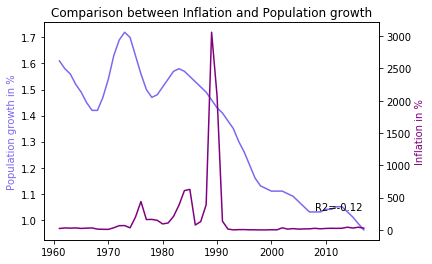

In [70]:
correlation(df_1, '%', df_2, '%', True)

The downward trend of the population growth was accompanied with an increase in inflation rate up to 1990.

We can check that dependency with the first derivative of the population growth against inflation rate:

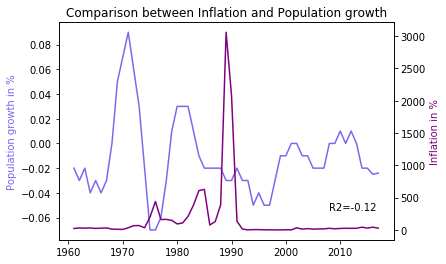

In [71]:
correlation(df_1, '%', df_2.diff(), '%', True)

 Until 1990 a low derivative is accompanied by a rising inflation rate.

### income share poorest 10% in Brazil

In [72]:
df = df_final.query('country == "Brazil"')
df.head()

,country,year,central_bank_discount_rate,unemployment_rate,inflation,population_growth,gini,income_per_person,income_share_m20,income_share_p10,income_share_r10
1003,Brazil,1948-01-01,NaN,NaN,NaN,NaN,NaN,2720.0,NaN,NaN,NaN
1004,Brazil,1949-01-01,NaN,NaN,NaN,NaN,NaN,2860.0,NaN,NaN,NaN
1005,Brazil,1950-01-01,NaN,NaN,NaN,NaN,NaN,2900.0,NaN,NaN,NaN
1006,Brazil,1951-01-01,NaN,NaN,NaN,NaN,NaN,2950.0,NaN,NaN,NaN
1007,Brazil,1952-01-01,NaN,NaN,NaN,NaN,NaN,3080.0,NaN,NaN,NaN


In [73]:
# smothing the curve with a rolling mean over 3 years
df_1 = df[['year','inflation']].set_index('year').rolling(3).mean()
df_2 = df[['year','income_share_p10']].set_index('year').rolling(3).mean()

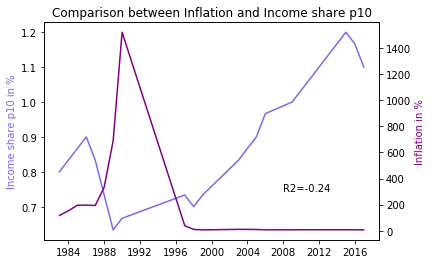

In [74]:
correlation(df_1, '%', df_2, '%', True)

During the peak of the hyperinflation in 1990, the income share of the poorest 10% dropped from 0.9% to approx. 0.6% and rised afterwards to 1.2%.

### income share middle 20% in Brazil

In [75]:
df = df_final.query('country == "Brazil"')
df.head()

,country,year,central_bank_discount_rate,unemployment_rate,inflation,population_growth,gini,income_per_person,income_share_m20,income_share_p10,income_share_r10
1003,Brazil,1948-01-01,NaN,NaN,NaN,NaN,NaN,2720.0,NaN,NaN,NaN
1004,Brazil,1949-01-01,NaN,NaN,NaN,NaN,NaN,2860.0,NaN,NaN,NaN
1005,Brazil,1950-01-01,NaN,NaN,NaN,NaN,NaN,2900.0,NaN,NaN,NaN
1006,Brazil,1951-01-01,NaN,NaN,NaN,NaN,NaN,2950.0,NaN,NaN,NaN
1007,Brazil,1952-01-01,NaN,NaN,NaN,NaN,NaN,3080.0,NaN,NaN,NaN


In [76]:
# smothing the curve with a rolling mean over 3 years
df_1 = df[['year','inflation']].set_index('year').rolling(3).mean()
df_2 = df[['year','income_share_m20']].set_index('year').rolling(3).mean()

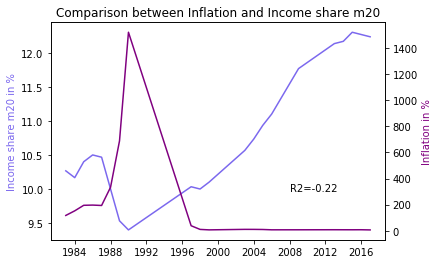

In [77]:
correlation(df_1, '%', df_2, '%', True)

During the peak of the hyperinflation in 1990, the income share of the middle 20% dropped from 10.5% to approx. 9.4% and rised afterwards to over 12%.

### income share richest 10% in Brazil

In [78]:
df = df_final.query('country == "Brazil"')
df.head()

,country,year,central_bank_discount_rate,unemployment_rate,inflation,population_growth,gini,income_per_person,income_share_m20,income_share_p10,income_share_r10
1003,Brazil,1948-01-01,NaN,NaN,NaN,NaN,NaN,2720.0,NaN,NaN,NaN
1004,Brazil,1949-01-01,NaN,NaN,NaN,NaN,NaN,2860.0,NaN,NaN,NaN
1005,Brazil,1950-01-01,NaN,NaN,NaN,NaN,NaN,2900.0,NaN,NaN,NaN
1006,Brazil,1951-01-01,NaN,NaN,NaN,NaN,NaN,2950.0,NaN,NaN,NaN
1007,Brazil,1952-01-01,NaN,NaN,NaN,NaN,NaN,3080.0,NaN,NaN,NaN


In [79]:
# smothing the curve with a rolling mean over 3 years
df_1 = df[['year','inflation']].set_index('year').rolling(3).mean()
df_2 = df[['year','income_share_r10']].set_index('year').rolling(3).mean()

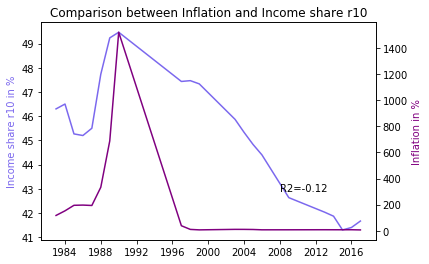

In [80]:
correlation(df_1, '%', df_2, '%', True)

During the peak of the hyperinflation in 1990, the income share of the richest 10% increased from 45% to approx. 49% and fell afterwards to 41%.

### GINI coerfficient in Brazil

In [81]:
df = df_final.query('country == "Brazil"')
df.head()

,country,year,central_bank_discount_rate,unemployment_rate,inflation,population_growth,gini,income_per_person,income_share_m20,income_share_p10,income_share_r10
1003,Brazil,1948-01-01,NaN,NaN,NaN,NaN,NaN,2720.0,NaN,NaN,NaN
1004,Brazil,1949-01-01,NaN,NaN,NaN,NaN,NaN,2860.0,NaN,NaN,NaN
1005,Brazil,1950-01-01,NaN,NaN,NaN,NaN,NaN,2900.0,NaN,NaN,NaN
1006,Brazil,1951-01-01,NaN,NaN,NaN,NaN,NaN,2950.0,NaN,NaN,NaN
1007,Brazil,1952-01-01,NaN,NaN,NaN,NaN,NaN,3080.0,NaN,NaN,NaN


In [82]:
# smothing the curve with a rolling mean over 3 years
df_1 = df[['year','inflation']].set_index('year').rolling(3).mean()
df_2 = df[['year','gini']].set_index('year').rolling(3).mean()

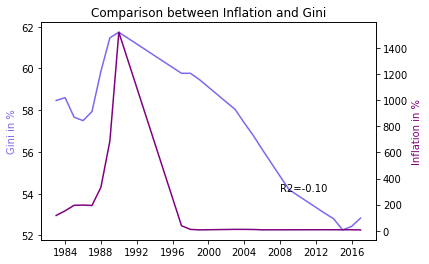

In [83]:
correlation(df_1, '%', df_2, '%', True)

During the peak of the hyperinflation in 1990, the GINI coefficient increased from 58% to 62% and fell afterwards to 52%.

<a id='results'></a>
## Results

The biggest hyperinflations in different countries and the corresponding reactions of the central bank discount rates during the currency crisis have been identified and analysed. Furthermore, correlations to population growth, real wages, unemployment rate, and social inequality were investigated.

The biggest hyperinflations from 1961 to 2017 for each country occurred in:

In [84]:
countries_hyper_html

country,year,inflation
Albania,1992-01-01,250.0
Angola,1996-01-01,4800.0
Armenia,1994-01-01,4110.0
Azerbaijan,1994-01-01,1390.0
Belarus,1994-01-01,1950.0
Bolivia,1985-01-01,12300.0
Brazil,1990-01-01,2700.0
Bulgaria,1997-01-01,959.0
Chile,1974-01-01,679.0
"Congo, Dem. Rep.",1994-01-01,26800.0


During most of the inflations, the central bank rose the discount rates to keep up with the inflation and to make lending more money more difficult. Furthermore, there is a global trend to more extreme hyperinflations in emerging countries.

During the last 60 years the world wide population growth has slowed down, with minor increases around 1980s and 2008. It seems that hyperinflations are more likely to occure during times, when the population growth is slowing down too fast. 

The mean real income is stagnating in times of high inflation rates. However, inflation rates are positively correlated with unemplyoment, which means people are more likely to loose their jobs in phases of a currency crisis. This leads also to an increase of social inequality in times of high inflations.